#### Calculates coherence of a single downlooked pixel for subsequent pairs

In [1]:
# notebook dependecies
import os,sys
import glob
from osgeo import gdal
import numpy as np
from array import array
import matplotlib.pyplot as plt
#%matplotlib  widget

#### <span style="color:red"> Edit this cell for path, point of interest, and downlook dims</span>

In [2]:
# working directory
workdir = '/data/krd86/cropped/'

pixx = 5000 # r full res coord
pixy = 200 # a full res coord

alooks = 4 # number of azimuth looks
rlooks = 20 # number of range looks

#### Load in dates

In [3]:
dates = [os.path.basename(x) for x in glob.glob(workdir+"SLC_vv/2*")]
dates = sorted(dates)
nd = len(dates)

#### Pulls out a box around a specific point, spatially averages over that box. This is currently set to VV only.

In [4]:
slcsvv = np.ndarray([len(dates),alooks,rlooks],'complex')
for i in np.arange(nd):
    ds = gdal.Open(workdir+"SLC_vv/"+dates[i]+"/"+dates[i]+".slc.full", gdal.GA_ReadOnly)
    slcsvv[i,:,:] = ds.GetRasterBand(1).ReadAsArray(pixx-rlooks/2,pixy-alooks/2,rlooks,alooks)

allcovsvv = np.zeros([nd])

numints = np.cumsum(np.arange(nd))
numints = np.max(numints)
ids = np.ndarray([numints,2])

for i in np.arange(nd-1):
        # making interferograms, only subsequent pairs
        ints = slcsvv[i,:,:] * np.conj(slcsvv[i+1,:,:])
        # take the mean over all the pixels in this area (complex space)
        cov = np.mean(ints,axis=(0,1))
        # this is same as <a a*>
        intmag = np.mean(np.abs(ints),axis=(0,1))
        # coherence magnitude 
        covw = cov/intmag
        allcovsvv[i]=np.abs(covw)   

#### Simple plot

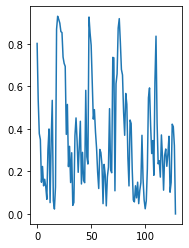

In [5]:
plt.subplot(1, 2, 1)
plt.plot(allcovsvv)